<a href="https://colab.research.google.com/github/ambassador7982/ambassadorSSA/blob/main/tartu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
try:
  import opendatasets as od
except ImportError as e:
  !pip install opendatasets
  import opendatasets as od

Loading the data
Here I just copied from Kaggle into a new directory called data and the file name was given as city_temp.zip

Checking the dataframes memory usage and info about the content of the data file.
NOTE: uncomment if you want to use this way!

In [24]:
# download the data
od.download("https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities")

# access them from the download folder
fn = "daily-temperature-of-major-cities/city_temperature.csv"
df = pd.read_csv(fn, low_memory=False) 
                    
# Check the memory usage                     
df.info(memory_usage="deep")

Skipping, found downloaded files in "./daily-temperature-of-major-cities" (use force=True to force download)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 767.7 MB


In [25]:
df.Region.unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [26]:
df[df.Region=="Europe"].City.unique()

array(['Tirana', 'Vienna', 'Minsk', 'Brussels', 'Sofia', 'Zagreb',
       'Nicosia', 'Prague', 'Copenhagen', 'Helsinki', 'Paris', 'Bordeaux',
       'Bonn', 'Frankfurt', 'Hamburg', 'Munich', 'Tbilisi', 'Athens',
       'Budapest', 'Reykjavik', 'Dublin', 'Milan', 'Rome', 'Riga',
       'Skopje', 'Amsterdam', 'Oslo', 'Warsaw', 'Lisbon', 'Bucharest',
       'Moscow', 'Yerevan', 'Pristina', 'Bratislava', 'Barcelona',
       'Bilbao', 'Madrid', 'Stockholm', 'Bern', 'Geneva', 'Zurich',
       'Kiev', 'Belfast', 'London', 'Belgrade'], dtype=object)

In [27]:
df = df[df.City == "Frankfurt"]

In [28]:
# Use only timestamp and avg temperature
df = df[['Year', 'Month', 'Day', 'AvgTemperature']]

# filter for meaningful temperatures
df = df[df['AvgTemperature']>-70]

# create a datetime object and set as index
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']]) 
df = df.set_index(df['Date'])

#Select only the temperature
df = df[['AvgTemperature']]

# Transfer to °C
df['AvgTemperature'] = (df['AvgTemperature']-32)*5/9

In [29]:
df.head(3)

,AvgTemperature
Date,
1995-01-03,0.611111
1995-01-04,-4.333333
1995-01-05,-5.888889


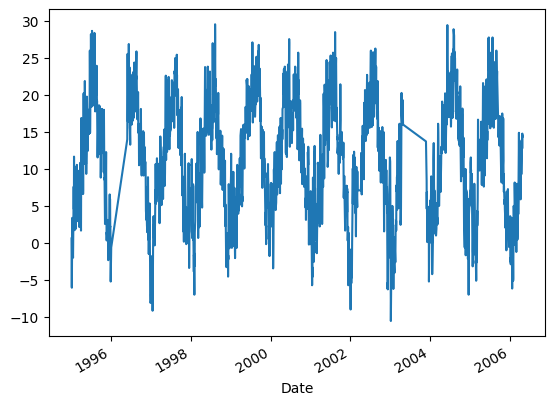

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331 entries, 1995-01-03 to 2006-04-28
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AvgTemperature  2331 non-null   float64
dtypes: float64(1)
memory usage: 36.4 KB
None


In [31]:
# Visualise the data
df['AvgTemperature'].plot()
plt.show()

print(df.info(memory_usage="deep"))
df.describe();